<img src=https://i.imgur.com/WKQ0nH2.jpg height=350>

# Setup and Context


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Introduction

Welcome to Boston Massachusetts in the 1970s! Imagine you're working for a real estate development company. Your company wants to value any residential project before they start. You are tasked with building a model that can provide a price estimate based on a home's characteristics like:
* The number of rooms
* The distance to employment centres
* How rich or poor the area is
* How many students there are per teacher in local schools etc

<img src=https://i.imgur.com/WfUSSP7.png height=350>

To accomplish your task you will:

1. Analyse and explore the Boston house price data
2. Split your data for training and testing
3. Run a Multivariable Regression
4. Evaluate how your model's coefficients and residuals
5. Use data transformation to improve your model performance
6. Use your model to estimate a property price

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [2]:
# %pip install --upgrade plotly

###  Import Statements


In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
# TODO: Add missing import statements

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data

The first column in the .csv file just has the row numbers, so it will be used as the index.

In [5]:
data = pd.read_csv('/content/drive/MyDrive/udemy data science/Multivariable+Regression+(Start)/boston.csv', index_col=0)

### Understand the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y).


# Preliminary Data Exploration 🔎


* What is the shape of `data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


In [7]:
data.shape

(506, 14)

In [8]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


In [10]:
data.isna().values.any()

False

In [11]:
data.duplicated().values.any()

False

**Insight:** The dataset have 506 rows and 14 columns. There is no null values or duplicates which mean that the dataset is cleaned.

## Descriptive Statistics


* How many students are there per teacher on average?
* What is the average price of a home in the dataset?
* What is the `CHAS` feature?
* What are the minimum and the maximum value of the `CHAS` and why?
* What is the maximum and the minimum number of rooms per dwelling in the dataset?

In [12]:
avg_student_per_teacher = data['PTRATIO'].mean()
print(f"The average student per teacher is {avg_student_per_teacher:.4}.")

The average student per teacher is 18.46.


In [13]:
avg_price = data['PRICE'].mean()
print(f"The average house price is {avg_price:.4}.")

The average house price is 22.53.


In [14]:
min_room = data['RM'].min()
max_room = data['RM'].max()
print(f"The maximum number of rooms per dwelling is {max_room}.")
print(f"The minimum number of rooms per dwelling is {min_room}.")

The maximum number of rooms per dwelling is 8.78.
The minimum number of rooms per dwelling is 3.561.


In [15]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


**Insight:** Here we notice a strange variable called CHAS which is just a dummy variable that tell us whether the home is next to the Charles River or not. The dummy variable can be a 1 or 0.


Another point to observe is that this data is from the 1970s, and at that time, the average home price was $22,530. This indicates that house prices have surged compared to today due to inflation.

## Visualise the Features



#### House Prices 💰

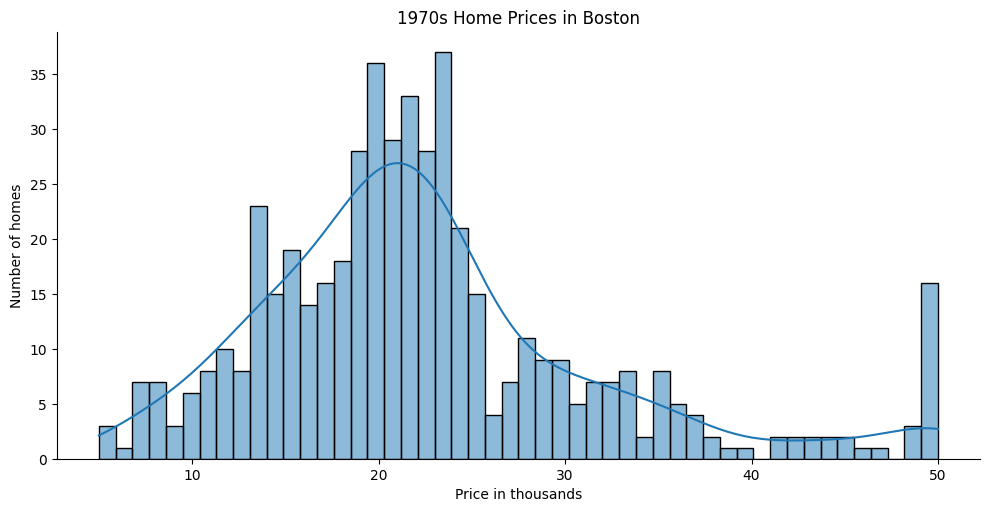

In [16]:
sns.displot(
    data = data,
    x = 'PRICE',
    bins = 50,
    kde = True,
    aspect = 2
)

plt.title("1970s Home Prices in Boston")
plt.ylabel("Number of homes")
plt.xlabel("Price in thousands")
plt.show()

**Insight:** During the 1970s we can see that home prices distribution actually resemble a normal distribution which explain why most of the home prices are concentrated around the mean of $22,530.

#### Distance to Employment - Length of Commute 🚗

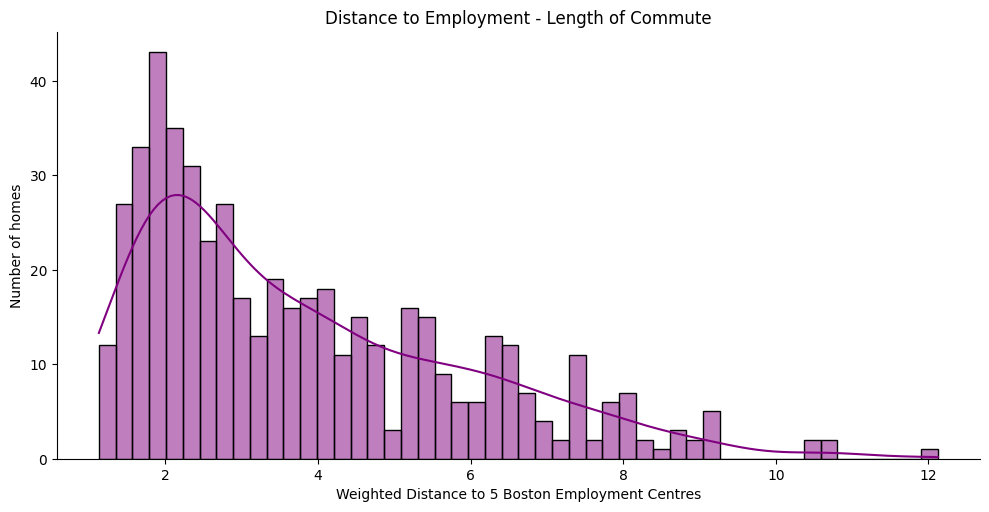

In [17]:
sns.displot(
    data = data,
    x = 'DIS',
    bins = 50,
    kde = True,
    aspect = 2,
    color = "purple"
)

plt.title("Distance to Employment - Length of Commute")
plt.ylabel("Number of homes")
plt.xlabel("Weighted Distance to 5 Boston Employment Centres")
plt.show()

**Insight:** This chart indicates that most homes are built near employment centers, with an average commute distance of about 3.8 miles. As we move away from the employment centers, we see that there are fewer and fewer homes.

#### Number of Rooms

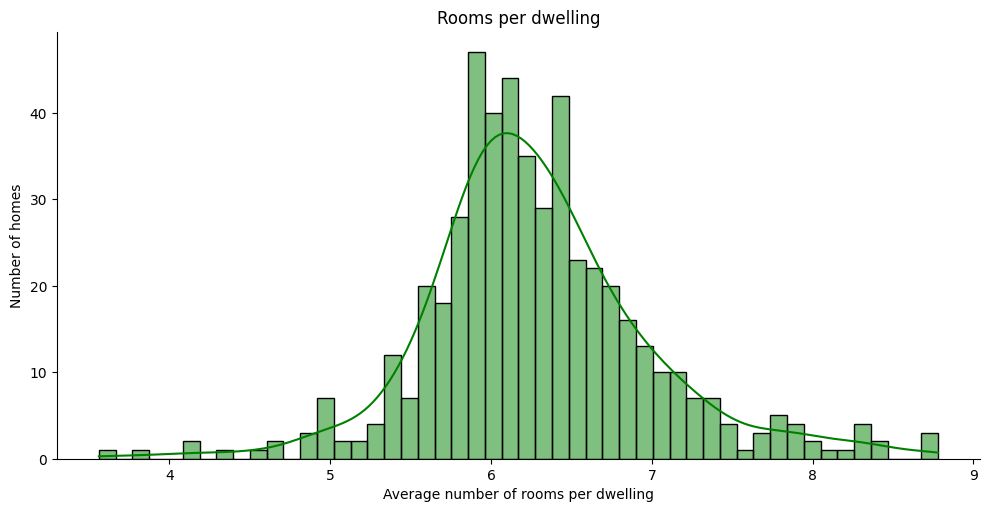

In [18]:
sns.displot(
    data = data,
    x = 'RM',
    bins = 50,
    kde = True,
    aspect = 2,
    color = "green"
)

plt.title(f"Rooms per dwelling")
plt.ylabel("Number of homes")
plt.xlabel("Average number of rooms per dwelling")
plt.show()

**Insight:**
Again, the number of rooms per dwelling or home also similar to a normal distribution with a mean of 6.3, where the majority of homes are situated.

#### Access to Highways 🛣

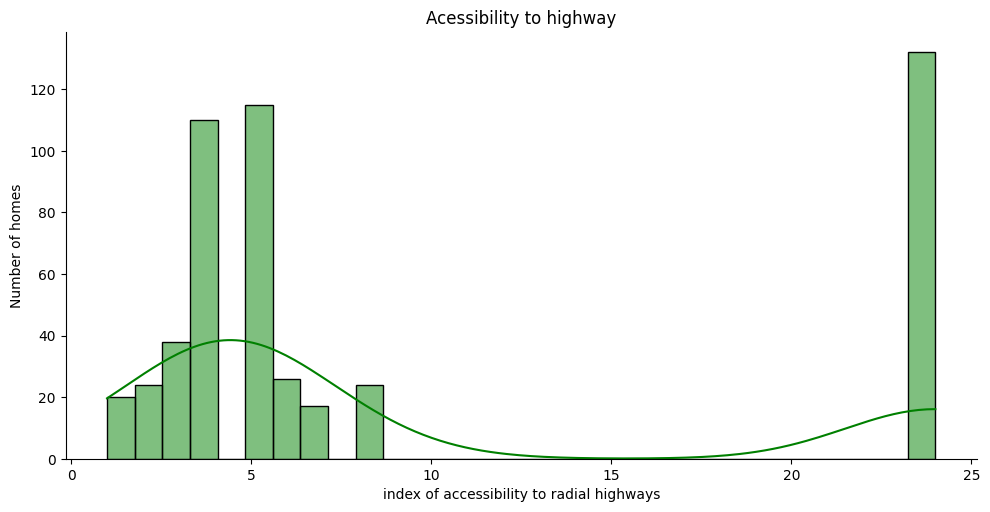

In [19]:
sns.displot(
    data = data,
    x = 'RAD',
    bins = 30,
    kde = True,
    aspect = 2,
    color = "green"
)

plt.title(f"Acessibility to highway")
plt.ylabel("Number of homes")
plt.xlabel("index of accessibility to radial highways")
plt.show()

**Insight:** RAD is an index of accessibility to radial highways, where a higher index signifies better access to highways. As depicted here, a substantial gap indicates that only a proportion of houses have high accessibility to highways, while the majority do not enjoy the same level of accessibility.

#### Next to the River? ⛵️


<img src=https://i.imgur.com/b5UaBal.jpg height=350>

In [20]:
river_access = data['CHAS'].value_counts()

bar = px.bar(
    x=['No', 'Yes'],
    y = river_access.values,
    color = river_access.values,
    color_continuous_scale=px.colors.sequential.haline,
    title='Next to the River?'
)

bar.update_layout(
    xaxis_title = 'Property Located near the River',
    yaxis_title = 'Number of Homes',
    coloraxis_showscale = False
)
bar.show()

**Insight:** a quick look at the chart, we can see that the majority of the homes are not near the Charles river.

# Understand the Relationships in the Data

### Run a Pair Plot


There might be some relationships in the data that we should know about. Before you run the code, make some predictions:

* What would you expect the relationship to be between pollution (NOX) and the distance to employment (DIS)?
* What kind of relationship do you expect between the number of rooms (RM) and the home value (PRICE)?
* What about the amount of poverty in an area (LSTAT) and home prices?


In [21]:
sns.pairplot(data)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Let's try to study the relationships between different variables

* DIS and NOX
* INDUS vs NOX
* LSTAT vs RM
* LSTAT vs PRICE
* RM vs PRICE


#### Distance from Employment vs. Pollution

Does pollution go up or down as the distance increases?

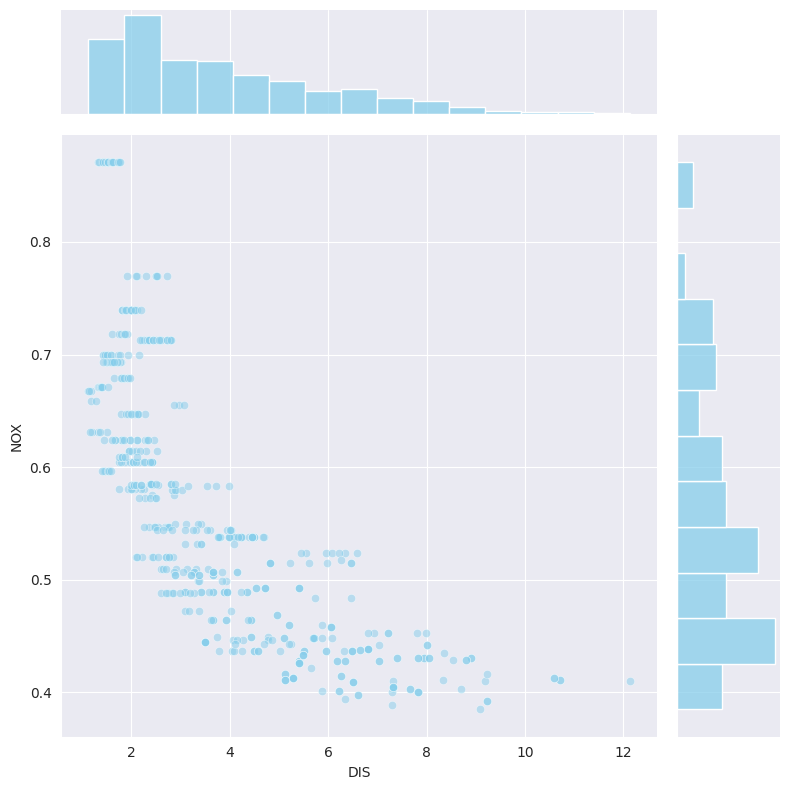

In [22]:
with sns.axes_style('darkgrid'):
  sns.jointplot(
      x = data['DIS'],
      y = data['NOX'],
      height = 8,
      kind = 'scatter',
      color = 'skyblue',
      joint_kws = {'alpha': 0.5}
  )
plt.show()

**Insight:** The graph depicts that as we go further and further out of the employment centers, there are less and less pollution which is very intuitive. However, we also notice that at 2 miles away from the employment centers, the nitric oxide pollution vary by a huge margin. Thus, indicating that different part of the employment zone have different pollution levels.

#### Proportion of Non-Retail Industry 🏭🏭🏭 versus Pollution

Does pollution go up or down as there is a higher proportion of industry?

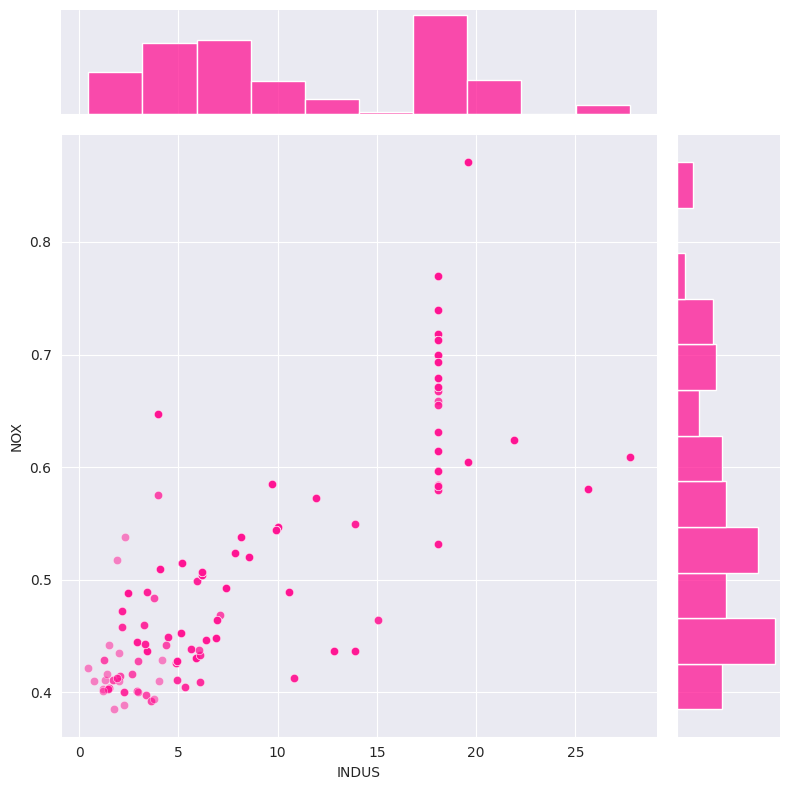

In [23]:
with sns.axes_style('darkgrid'):
  sns.jointplot(
      x = data['INDUS'],
      y = data['NOX'],
      height = 8,
      kind = 'scatter',
      color = 'deeppink',
      joint_kws = {'alpha': 0.5}
  )
plt.show()

**Insight:** Due the fact that factories often produce huge amount of pollution, we observed that there's a positive correlation between the amount of nitric pollution and proportion of non-retail industry.

#### % of Lower Income Population vs Average Number of Rooms


How does the number of rooms per dwelling vary with the poverty of area? Do homes have more or fewer rooms when LSTAT is low?

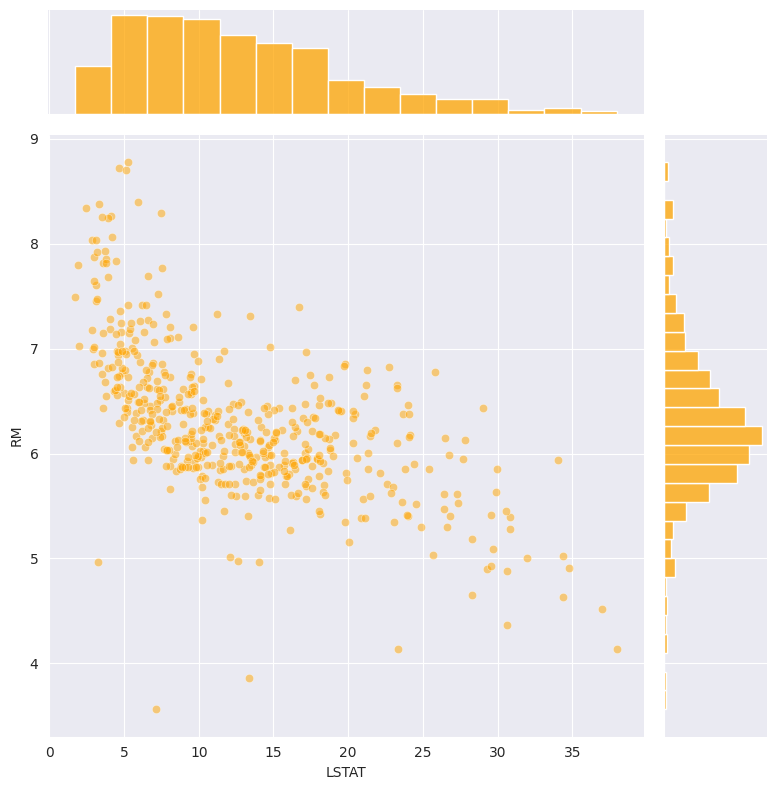

In [24]:
with sns.axes_style('darkgrid'):
  sns.jointplot(
      x = data['LSTAT'],
      y = data['RM'],
      height = 8,
      kind = 'scatter',
      color = 'orange',
      joint_kws = {'alpha': 0.5}
  )
plt.show()

**Insight:** This graph illustrate a negative correlation between RM and LSTAT. We noticed areas that only have 5% of low-income population, have houses with on average 6 to 9 rooms. The number of rooms decrease as the proportion of low-income increases.

#### % of Lower Income Population versus Home Price



How does the proportion of the lower-income population in an area affect home prices?

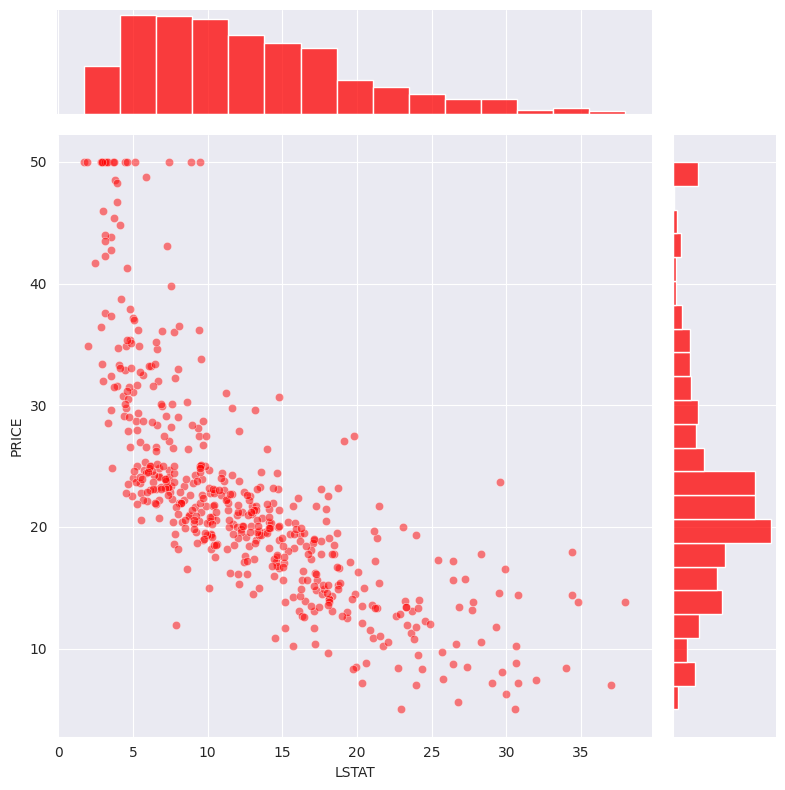

In [25]:
with sns.axes_style('darkgrid'):
  sns.jointplot(
      x = data['LSTAT'],
      y = data['PRICE'],
      height = 8,
      kind = 'scatter',
      color = 'red',
      joint_kws = {'alpha': 0.5}
  )
plt.show()

**Insight:** In term of house prices, we can see that most of the expensive houses are concentrated in areas that have low proportion of low-income population. As the proportion of low-income population get larger the price of houses subsquently get cheaper.

**Insight:**

#### Number of Rooms versus Home Value


You can probably guess how the number of rooms affects home prices.

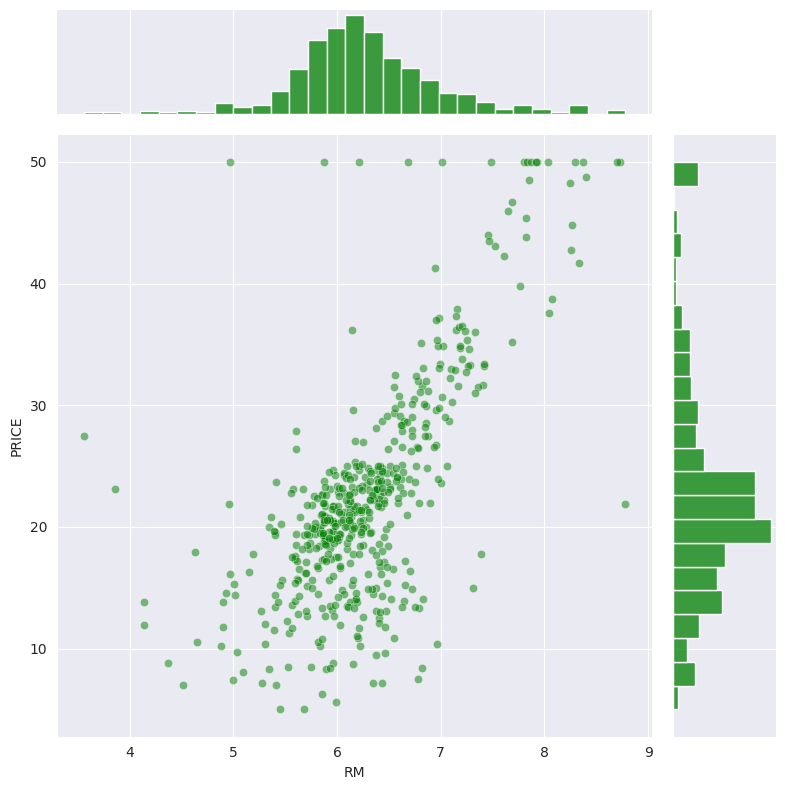

In [26]:
with sns.axes_style('darkgrid'):
  sns.jointplot(
      x = data['RM'],
      y = data['PRICE'],
      height = 8,
      kind = 'scatter',
      color = 'green',
      joint_kws = {'alpha': 0.5}
  )

plt.show()

**Insight:** House prices are also seem to be affected by the number of rooms.


# Split Training & Test Dataset

We *can't* use all 506 entries in our dataset to train our model. The reason is that we want to evaluate our model on data that it hasn't seen yet (i.e., out-of-sample data). That way we can get a better idea of its performance in the real world.







In [27]:
from sklearn.model_selection import train_test_split
target = data['PRICE']
features = data.drop('PRICE', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size = 0.2,
    random_state = 10
)

In [28]:
# % of training set
train_pct = (len(X_train)/len(features))*100
print(f"Training data percentage: {train_pct:.3} %")

Training data percentage: 79.8 %


In [29]:
# % of testing set
test_pct = (len(X_test)/len(features))*100
print(f"test data percentage: {test_pct:.3} %")

test data percentage: 20.2 %


# Multivariable Regression

We have a total of 13 features. Therefore, our Linear Regression model will have the following form:

$$ PR \hat ICE = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta _3 DIS + \theta _4 CHAS ... + \theta _{13} LSTAT$$

### Run Your First Regression


Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data?

In [30]:
reg = LinearRegression()
reg.fit(X_train, y_train)
rsquared = reg.score(X_train, y_train)

print(f"The rsqaured of the training data is: {rsquared:.2}.")

The rsqaured of the training data is: 0.75.


**Insight:** R-squared of 0.75 is very high which mean that our regression model is able explained 75% of the variance in the dataset.

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative).


In [31]:
reg_coef = pd.DataFrame(data = reg.coef_, index = X_train.columns, columns = ['Coefficient'])
reg_coef

,Coefficient
CRIM,-0.13
ZN,0.06
INDUS,-0.01
CHAS,1.97
NOX,-16.27
RM,3.11
AGE,0.02
DIS,-1.48
RAD,0.30
TAX,-0.01


In [32]:
premium = reg_coef.loc['RM'].values[0] * 1000
print(f"For every extra room we have to pay ${premium:.5} more.")

For every extra room we have to pay $3108.5 more.


**Insight:**
In addition to the RM coefficient, it's important to highlight a significantly negative coefficient for NOX. This is because a change of one unit in NOX has a notably large impact, which is not commonly observed. Moreover, the dataset's maximum NOX is only 0.871.


### Analyse the Estimated Values & Regression Residuals

The next step is to evaluate our regression. How good our regression is depends not only on the r-squared. It also depends on the **residuals** or **errors**- the difference between the model's predictions ($\hat y_i$) and the true values ($y_i$) inside `y_train`.




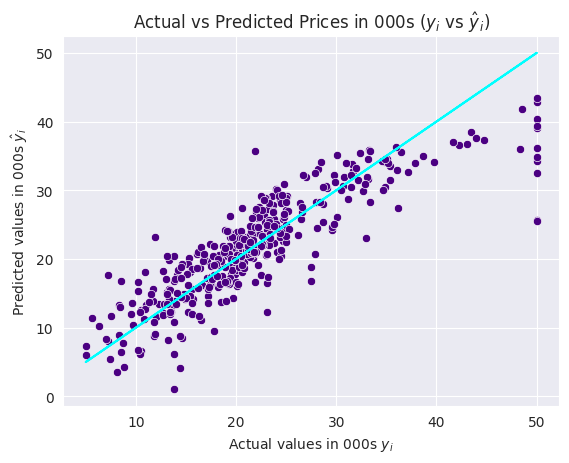

In [33]:
predicted_values = reg.predict(X_train)

with sns.axes_style('darkgrid'):
  sns.scatterplot(
      x = y_train,
      y = predicted_values,
      color = 'indigo',

  )
plt.plot(y_train, y_train, color = 'cyan')
plt.title(f"Actual vs Predicted Prices in 000s ($y_i$ vs $\hat y_i$)")
plt.xlabel("Actual values in 000s $y _i$")
plt.ylabel("Predicted values in 000s $\hat y_i$")
plt.show()

**Insight:** The cyan line represents the actual prices. A model with 100% accuracy would align perfectly with all the dots on the line, and the farther a dot is from the line, the less accurate the model. Our model performs relatively well, as indicated by the proximity of most dots to the line.

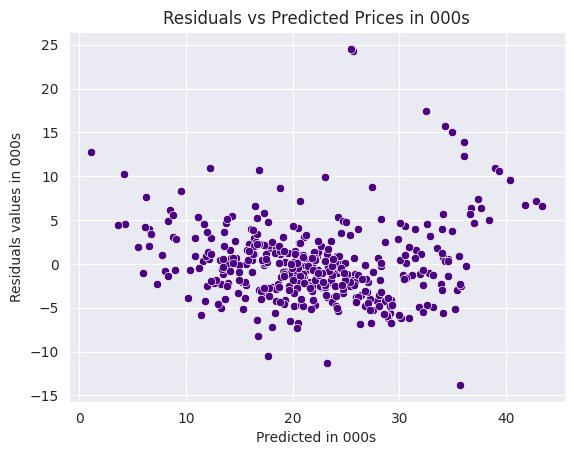

In [34]:
residuals = y_train - predicted_values
with sns.axes_style('darkgrid'):
  sns.scatterplot(
      x = predicted_values,
      y = residuals,
      color = 'indigo',

  )
plt.title(f"Residuals vs Predicted Prices in 000s")
plt.xlabel("Predicted in 000s")
plt.ylabel("Residuals values in 000s")
plt.show()

**Insight:** The majority of the residuals are between -5 and 5 which is relatively low.

Why do we want to look at the residuals? We want to check that they look random. Why? The residuals represent the errors of our model. If there's a pattern in our errors, then our model has a systematic bias.

We can analyse the distribution of the residuals. In particular, we're interested in the **skew** and the **mean**.

In an ideal case, what we want is something close to a normal distribution. A normal distribution has a skewness of 0 and a mean of 0. A skew of 0 means that the distribution is symmetrical - the bell curve is not lopsided or biased to one side. Here's what a normal distribution looks like:

<img src=https://i.imgur.com/7QBqDtO.png height=400>


* Calculate the mean and the skewness of the residuals.


In [35]:
resid_mean = round(residuals.mean(),2)
resid_skew = round(residuals.skew(),2)
print(f"Mean: {resid_mean}")
print(f"Skew: {resid_skew}")

Mean: 0.0
Skew: 1.46


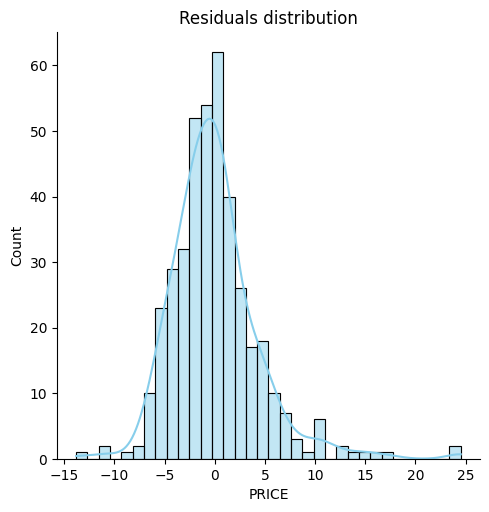

In [36]:
sns.displot(
    x = residuals,
    color = "skyblue",
    kde = True
)
plt.title('Residuals distribution')
plt.show()

**Insight:** Our residual skew here is 1.46 which indicate that our residual is slightly skew to the right. There could be some room for further improvement.

### Data Transformations for a Better Fit

We have two options at this point:

1. Change our model entirely. Perhaps a linear model is not appropriate.
2. Transform our data to make it fit better with our linear model.

Let's try a data transformation approach.



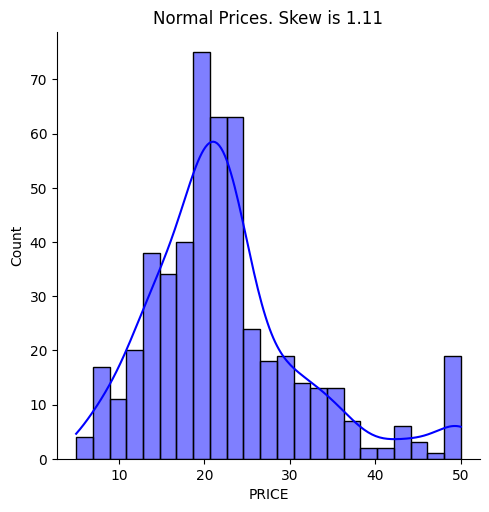

In [37]:
skew = data['PRICE'].skew()
sns.displot(
    data['PRICE'], kde = True, color = 'blue'
)
plt.title(f"Normal Prices. Skew is {skew:.3}")
plt.show()

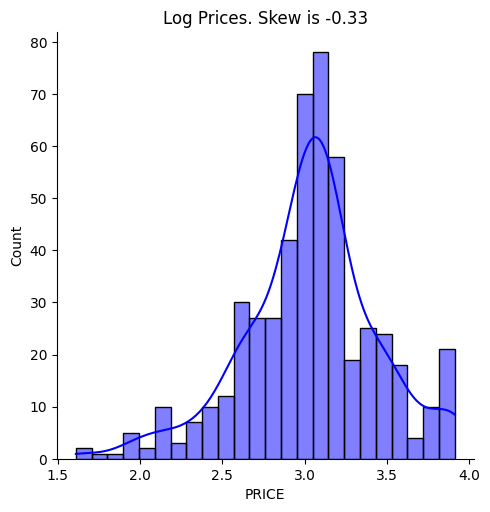

In [38]:
log_skew = np.log(data['PRICE'])
sns.displot(
    log_skew, kde = True, color = 'blue'
)
plt.title(f"Log Prices. Skew is {log_skew.skew():.3}")
plt.show()

**Insight:** We can see there is significant different with the log price only have a skew value of -0.33 which is a lot closer to 0 than normal prices. This indicate that the log price is more suitable for our model.

#### How does the log transformation work?

Using a log transformation does not affect every price equally. Large prices are affected more than smaller prices in the dataset. Here's how the prices are "compressed" by the log transformation:

<img src=https://i.imgur.com/TH8sK1Q.png height=200>

We can see this when we plot the actual prices against the (transformed) log prices.

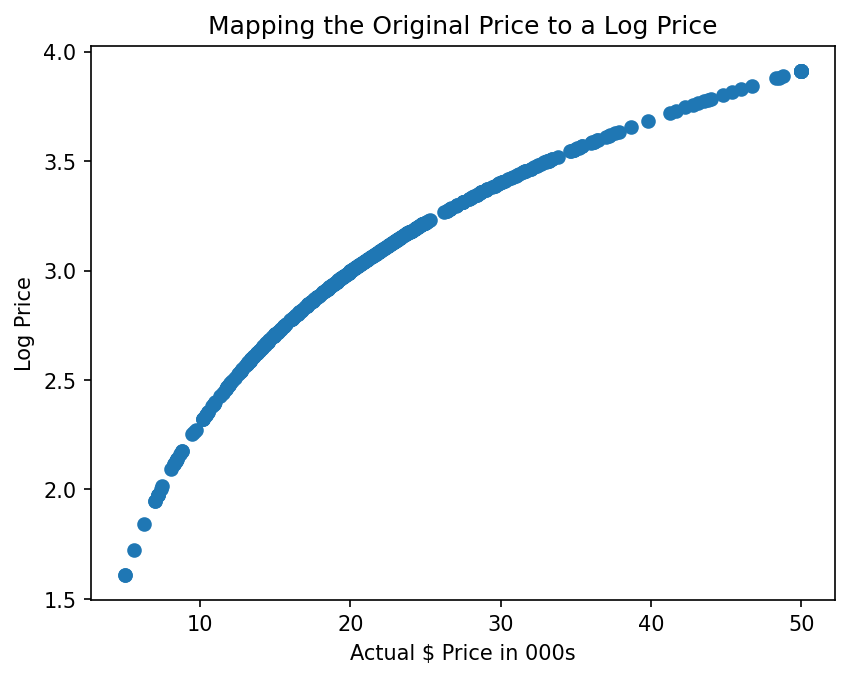

In [39]:
plt.figure(dpi=150)
plt.scatter(data.PRICE, np.log(data.PRICE))

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 000s')
plt.show()

## Regression using Log Prices

Using log prices instead, our model has changed to:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$


* Use `train_test_split()` with the same random state as before to make the results comparable.
* Run a second regression, but this time use the transformed target data.
* What is the r-squared of the regression on the training data?
* Have we improved the fit of our model compared to before based on this measure?


In [40]:
new_target = np.log(data.PRICE)
features = data.drop('PRICE', axis = 1)

X_train, X_test, log_y_train, log_y_test = train_test_split(
    features,
    new_target,
    test_size = 0.2,
    random_state = 10
)

log_reg = LinearRegression()
log_reg.fit(X_train, log_y_train)
log_rsquared = log_reg.score(X_train, log_y_train)

print(f"The training R squared = {log_rsquared:.2}")

The training R squared = 0.79


**Insight:** The values of R squared increased from 0.75 to 0.79 which can considered to be significant improvement overall.

## Evaluating Coefficients with Log Prices

Print out the coefficients of the new regression model.



In [41]:
log_coeff = pd.DataFrame(log_reg.coef_, index=X_train.columns, columns = ["Coefficient"])
log_coeff

,Coefficient
CRIM,-0.01
ZN,0.00
INDUS,0.00
CHAS,0.08
NOX,-0.70
RM,0.07
AGE,0.00
DIS,-0.05
RAD,0.01
TAX,-0.00


**Insight:** Features with negative coefficients exert a negative impact on home prices, while those with positive coefficients indicate a positive impact. For example, CHAS has a coefficient of 0.08, suggesting that homes near the river have higher prices. In contrast, PTRATIO, representing the number of students per teacher, typically associated with education quality, has a negative coefficient of -0.03. This implies that as PTRATIO increases, indicating larger class sizes, which in turn cause house prices to decrease due to a perceived lower quality of education.








## Regression with Log Prices & Residual Plots




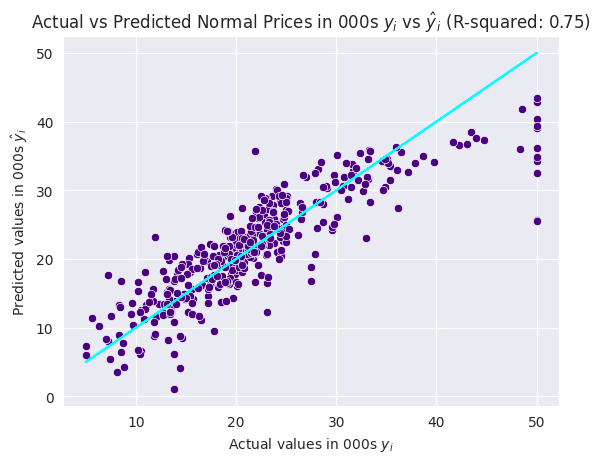

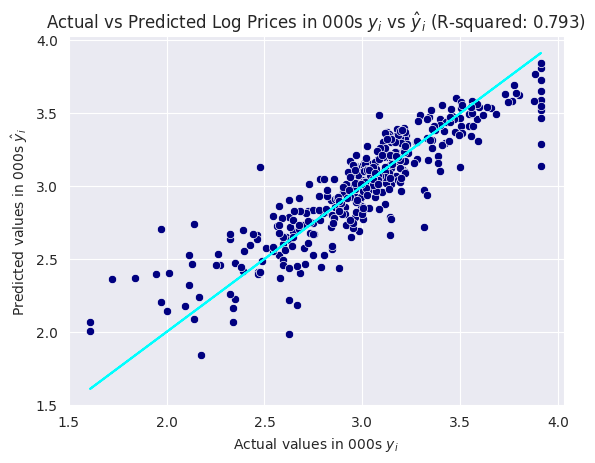

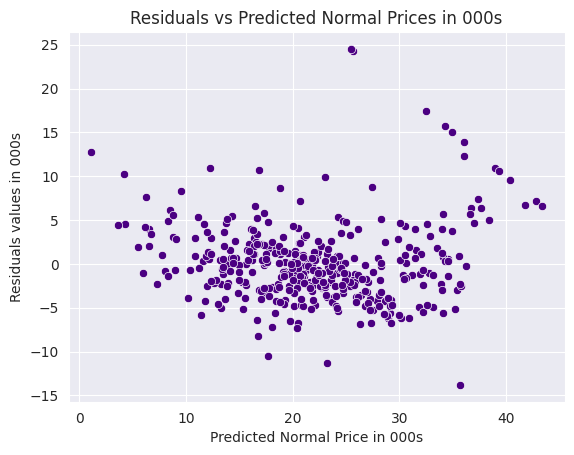

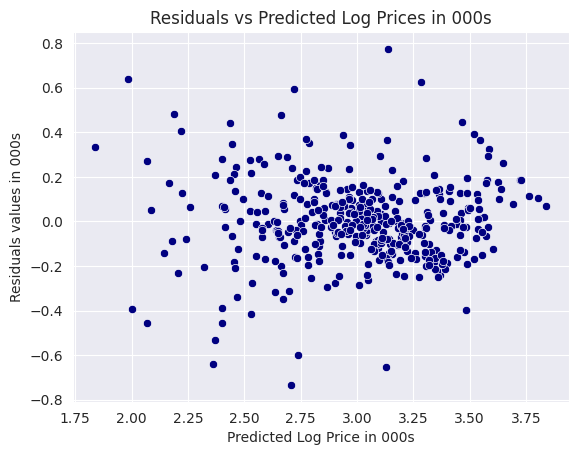

In [47]:
# Actual vs Predict normal price
predicted_values = reg.predict(X_train)

with sns.axes_style('darkgrid'):
  sns.scatterplot(
      x = y_train,
      y = predicted_values,
      color = 'indigo',

  )
plt.plot(y_train, y_train, color = 'cyan')
plt.title(f"Actual vs Predicted Normal Prices in 000s $y_i$ vs $\hat y_i$ (R-squared: {rsquared:.2})")
plt.xlabel("Actual values in 000s $y _i$")
plt.ylabel("Predicted values in 000s $\hat y_i$")
plt.show()

print("")
# Actual vs Predicted log price
predicted_log_values = log_reg.predict(X_train)

with sns.axes_style('darkgrid'):
  sns.scatterplot(
      x = log_y_train,
      y = predicted_log_values,
      color = 'navy',

  )
plt.plot(log_y_train, log_y_train, color = 'cyan')
plt.title(f"Actual vs Predicted Log Prices in 000s $y_i$ vs $\hat y_i$ (R-squared: {log_rsquared:.3})")
plt.xlabel("Actual values in 000s $y _i$")
plt.ylabel("Predicted values in 000s $\hat y_i$")
plt.show()
print("")

# Residuals vs Predicted Normal Prices
residuals = y_train - predicted_values
with sns.axes_style('darkgrid'):
  sns.scatterplot(
      x = predicted_values,
      y = residuals,
      color = 'indigo',

  )
plt.title(f"Residuals vs Predicted Normal Prices in 000s")
plt.xlabel("Predicted Normal Price in 000s")
plt.ylabel("Residuals values in 000s")
plt.show()
print("")

# Residuals vs Predicted Normal Prices
log_residuals = log_y_train - predicted_log_values
with sns.axes_style('darkgrid'):
  sns.scatterplot(
      x = predicted_log_values,
      y = log_residuals,
      color = 'navy',

  )
plt.title(f"Residuals vs Predicted Log Prices in 000s")
plt.xlabel("Predicted Log Price in 000s")
plt.ylabel("Residuals values in 000s")
plt.show()

**Insight:**
By using the logarithm of the price, we can observe that the distance between the line and dots is slightly reduced. Nevertheless, eye balling the difference is quite a challenge.



Calculate the mean and the skew for the residuals using log prices. Are the mean and skew closer to 0 for the regression using log prices?

In [48]:
log_mean = round(log_residuals.mean(),2)
log_skew = round(log_residuals.skew(),2)
print(f"The Log_mean is: {log_mean}")
print(f"The Log_skew is: {log_skew}")

The Log_mean is: -0.0
The Log_skew is: 0.09


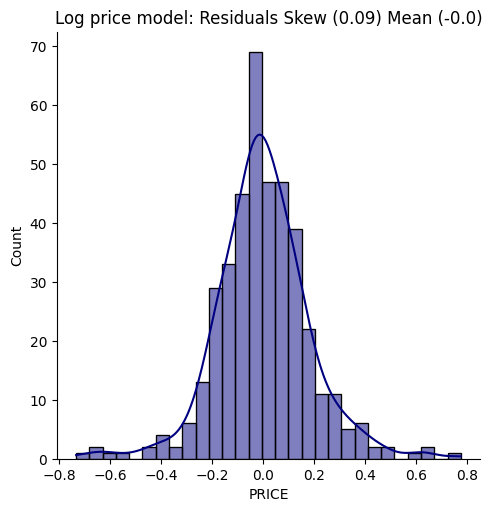

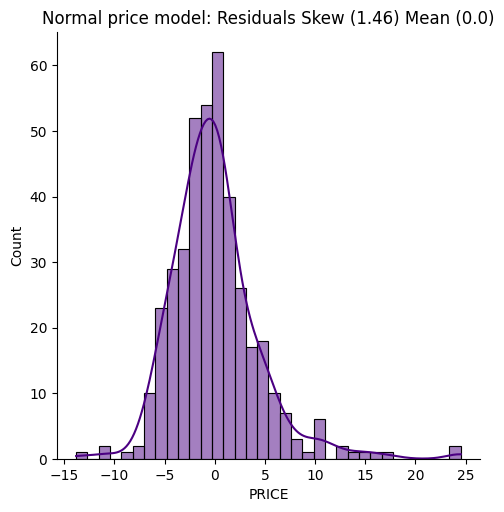

In [51]:
sns.displot(log_residuals, kde = True, color = "navy")
plt.title(f'Log price model: Residuals Skew ({log_skew}) Mean ({log_mean})')
plt.show()
print("")

sns.displot(residuals, kde = True, color = "indigo")
plt.title(f'Normal price model: Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

**Insight:**
With the new regression, the skewness value has decreased to 0.09 compared to the previous 1.46, while the mean remains at 0. This indicates an improvement in our model through data transformation, as evidenced by enhanced residuals and R-square values.

# Compare Out of Sample Performance

The *real* test is how our model performs on data that it has not "seen" yet. This is where our `X_test` comes in.


Compare the r-squared of the two models on the test dataset. Which model does better? Is the r-squared higher or lower than for the training dataset? Why?

In [52]:
print(f"Original Model Test Data r-squared: {reg.score(X_test, y_test):.2}")
print(f"Log Model Test Data r-squared: {log_reg.score(X_test, log_y_test):.2}")

Original Model Test Data r-squared: 0.67
Log Model Test Data r-squared: 0.74


**Insight:**
Again, the log model is much better than the original one. However, both models show lower accuracy when tested with new, unseen data, which explain the decrease in R-squared.

# Predict a Property's Value using the Regression Coefficients

Our preferred model now has an equation that looks like this:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

The average property has the mean value for all its charactistics:

In [43]:
# Starting Point: Average Values in the Dataset
features = data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)),
                              columns=features.columns)
property_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65



Predict how much the average property is worth using the stats above. What is the log price estimate and what is the dollar estimate?

In [ ]:
# Make predictions
log_est = log_reg.predict(property_stats)[0]
print(f"The log price estimate price is {log_est:.3}.")

# Calculate the actual predict
actual_price = np.e**log_est * 1000
print(f"The estimate price in dollars is ${actual_price:.7}")

**Insight:** Base on our linear regression model, the estimate home price for this particular stats is $20,703.18.

**Example:**

Keeping the average values for CRIM, RAD, INDUS and others, value a property with the following characteristics:

In [61]:
# Define Property Characteristics
next_to_river = True
nr_rooms = 8
students_per_classroom = 20
distance_to_town = 5
pollution = data.NOX.quantile(q=0.75) # high
amount_of_poverty =  data.LSTAT.quantile(q=0.25) # low

In [62]:
# Solution:
if next_to_river:
  property_stats['CHAS'] = 1
else:
  property_stats['CHAS'] = 0
property_stats['RM'] = nr_rooms
property_stats['PTRATIO'] = students_per_classroom
property_stats['DIS'] = distance_to_town
property_stats['NOX'] = pollution
property_stats['LSTAT'] = amount_of_poverty

In [64]:
# Estimate home price
est = log_reg.predict(property_stats)[0]
dollar_price = np.exp(est) * 1000
print(f"The estimate price is ${dollar_price:.6}.")

The estimate price is $25792.0.


**Insight:** For this example, the estimate price is $25,792.